In [1]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import lxml
import pandas as pd
from lxml import objectify, etree, html
import json
from pandas import read_csv
from pymystem3 import Mystem
from itertools import combinations
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# ClassWork

In [2]:
topics = ['politics', 'science', 'culture', 'economy']

In [3]:
topicsInd = {'politics' : 0, 'science' : 1, 'culture' : 2, 'economy' : 3}

**Use corpus which was collected and saved in last *HomeWork* **

Input collected texts:

In [4]:
xmlstr = open('initial_texts.xml', encoding='utf-8').read()

In [5]:
utf8_parser = etree.XMLParser(encoding='utf-8')
root = etree.fromstring(xmlstr.encode('utf-8'), parser=utf8_parser)

In [6]:
allText = ({})

for topic in root:       
    texts = []
    for text in topic:
        sentances = []
        for sent in text:
            sentances.append(sent.text)
        t = ' '.join(sentances)
        texts.append((text.attrib['Title'], t))
    allText[topic.attrib["TopicName"]] = texts

Dictionary with lemmas and their indexes:

In [7]:
dictionary = read_csv('dictionary.csv',';', encoding='cp1251')

In [8]:
words = dictionary["Words"]
words = words.get_values()
words

array(['Ён', 'А1', 'А2', ..., 'ячейка', 'ящер', 'ящик'], dtype=object)

In [9]:
dictWordToIndex = {w: (list(words).index(w)) for w in words}
dictWordToIndex

{'Ён': 0,
 'А1': 1,
 'А2': 2,
 'А5': 3,
 'АСВ': 4,
 'АТФ': 5,
 'АФК': 6,
 'БВМ': 7,
 'БДТ': 8,
 'БЗК': 9,
 'БКС': 10,
 'БМ': 11,
 'БТС': 12,
 'Вa1': 13,
 'ВБРР': 14,
 'ВВВ': 15,
 'ВРП': 16,
 'ВШЭ': 17,
 'Ва1': 18,
 'ГД': 19,
 'ГРЦ': 20,
 'ГТС': 21,
 'ДЗЗ': 22,
 'ДКП': 23,
 'ДНР': 24,
 'Духless': 25,
 'ЕК': 26,
 'ЗСТ': 27,
 'ИМБП': 28,
 'КЖК': 29,
 'КМГ': 30,
 'КМГК': 31,
 'КЦ': 32,
 'ЛНР': 33,
 'Лю': 34,
 'М1а1': 35,
 'МКМЦ': 36,
 'МЛМ': 37,
 'ММКФ': 38,
 'МРЦ': 39,
 'МС': 40,
 'МСП': 41,
 'МТР': 42,
 'МФЦ': 43,
 'МХТ': 44,
 'Ма': 45,
 'Н2А': 46,
 'НДФЛ': 47,
 'НК': 48,
 'НТС': 49,
 'ОА': 50,
 'ОЗК': 51,
 'ОФЗ': 52,
 'ПСБ': 53,
 'РА': 54,
 'РБК': 55,
 'РД': 56,
 'РКК': 57,
 'РКС': 58,
 'РМГ': 59,
 'РФК': 60,
 'Россия1': 61,
 'СБ': 62,
 'СНВ': 63,
 'СО2': 64,
 'СПГ': 65,
 'СПФС': 66,
 'СР': 67,
 'СТГТ': 68,
 'ТВЗ': 69,
 'ТНС': 70,
 'ТПК': 71,
 'ТТ': 72,
 'ТТП': 73,
 'ФНБ': 74,
 'ФНПР': 75,
 'ФССП': 76,
 'ФТС': 77,
 'ФЦП': 78,
 'Фейу': 79,
 'ХIХ': 80,
 'ХХ': 81,
 'ХХII': 82,
 'Хо': 83,
 

Texts with indexes of lemmas instead of words (also saved in last HomeWork):

In [10]:
xmlstr = open('indexes_text.xml', encoding='utf-8').read()
utf8_parser = etree.XMLParser(encoding='utf-8')
root = etree.fromstring(xmlstr.encode('utf-8'), parser=utf8_parser)

In [11]:
dictLemmas = ({})

for topic in root:       
    texts = []
    for text in topic:
        sentances = []
        for sent in text:
            sentances.append(sent.text)
        strr = ""
        for s in sentances:
            if s is not None:
                strr += " " + s
        texts.append((text.attrib['Title'], strr))
    dictLemmas[topic.attrib["TopicName"]] = texts

Create dataset in convenient for prediction format:

In [12]:
texts = pd.DataFrame(columns=["Topic", "TextId", "Title", "Text"])
for topic in dictLemmas.keys():
    i = 0
    for pair in dictLemmas[topic]:
        texts = texts.append({"Topic" : topic, "TextId" : i, "Title" : pair[0], "Text" : pair[1]}, ignore_index=True)
        i += 1
texts

Topic TextId                                              Title  \
0    politics      0  Встреча Лаврова и Зарифа прорабатывается, заяв...   
1    politics      1  Путин обсудил с Силуановым и Пучковым госпрогр...   
2    politics      2        Медведев назначил Шпади замглавы Росжелдора   
3    politics      3  Медведев освободил Луковникова от должности за...   
4    politics      4  ЦИК получил документы для регистрации Грудинин...   
5    politics      5  Медведев освободил Огородову от должности замм...   
6    politics      6  В ЦИК недоумевают из-за заявления ЕС о недопус...   
7    politics      7  Подписи в поддержку Бабурина планируют сдать в...   
8    politics      8  Саудовская Аравия ратифицировала меморандум о ...   
9    politics      9  Кандидат в президенты Бабурин рассказал о свое...   
10   politics     10  Партия кандидата в президенты России Бабурина ...   
11   politics     11  Баков пополнит избирательный счет на 400 милли...   
12   politics     12  Песков не стал отвечать на вопросы об избирате...   
13   politics     13    Путин в среду будет работать в Тверской области   
14   politics     14  Песков рассказал, когда сформируют предвыборны...   
15   politics     15  Володин предложил регистрировать депутатов по ...   
16   politics     16                    Путин открыл избирательный штаб   
17   politics     17  Путин изменил контуры политтехнологической раб...   
18   politics     18  ЦИК не зарегистрировал группу избирателей в по...   
19   politics     19       Путину передали список из 264 доверенных лиц   
20   politics     20  Путин одобрил новый состав резерва управленчес...   
21   politics     21              Путин прибыл в свой предвыборный штаб   
22   politics     22  В Госдуме заявили о попытках вмешательства СМИ...   
23   politics     23  Североамериканский тупик: в ГД предложили смен...   
24   politics     24  Огородову назначили замгубернатора Томской обл...   
25   politics     25              Путин назначил нового посла в Уругвае   
26   politics     26  Путин одобрил новый состав резерва управленчес...   
27   politics     27             Путин назначил нового посла в Германии   
28   politics     28  В ГД рассказали, куда пропали карточки для гол...   
29   politics     29  Эксперты предположили, когда Запад снимет с по...   
..        ...    ...                                                ...   
810   economy    180  ФАС не нашла сговора компаний такси по ценам п...   
811   economy    181  Центробанк выступил против обмена криптовалют ...   
812   economy    182  Дворкович о вероятности отключения Swift для Р...   
813   economy    183  Комитет ГД по собственности поддержал законопр...   
814   economy    184  Источник: "Русал" разместит пятилетние евробон...   
815   economy    185  Нацбанк рассказал, сколько Украина не получила...   
816   economy    186  В ОАК рассказали о работе над новым сверхзвуко...   
817   economy    187  Росстат сообщил, как изменилась добыча нефти и...   
818   economy    188  Глава AmCham объяснил, почему американцы избег...   
819   economy    189  Трунин рассказал о возможном законопроекте по ...   
820   economy    190  В ЦБ оценили состояние российского банковского...   
821   economy    191  Минфин рассчитывает на окончательную победу в ...   
822   economy    192  Россия и ЕС продолжат диалог по свинине без но...   
823   economy    193  Период траты суверенных фондов для России зако...   
824   economy    194  Моргулов обсудил с представителем Южной Кореи ...   
825   economy    195  Орешкин оценил рейтинг России в Fitch, Moody's...   
826   economy    196  Ни одна страна не должна доминировать в энерге...   
827   economy    197       Орешкин оценил обстановку на форуме в Давосе   
828   economy    198  Апелляционный суд Англии завершил слушания по ...   
829   economy    199  Трамп заявил, что сейчас лучшее время для инве...   
830   economy    200  Трамп заявил, что готов к двусторонним сделкам...   
831   economy    201  Эксперты не

Separate attributes from labels and create train and test samples:

In [13]:
X = texts.Text
X[0:10]

0     1864 2299 6117 10796 11148 5437 2299 6117 426...
1     9408 10796 1540 10024 6517 11537 6187 13317 4...
2     9378 9282 10796 3004 5968 6594 6790 13012 424...
3     9378 9282 3004 5968 7833 3661 10762 13238 154...
4     13003 9384 5182 1601 1877 8714 13688 10733 30...
5     9378 9282 10796 3004 5968 7833 7907 3091 3661...
6     3834 9448 11093 3291 11400 1577 11039 8642 86...
7     4488 9408 10796 5570 8251 10730 7482 11747 11...
8     11532 6187 10920 488 9585 10598 10400 6026 11...
9     4488 9408 10796 5570 8251 10730 7482 11747 11...
Name: Text, dtype: object

In [14]:
Y = [topicsInd[x] for x in texts.Topic]
Y[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
vector = CountVectorizer()
tfidf = TfidfTransformer()

x = vector.fit_transform(X)
x = tfidf.fit_transform(x)
x.toarray().shape

(840, 14370)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state = 5)

Check dimension of samples for samples and for all topics:

In [17]:
print("Shape of X_train: ", X_train.shape)
print("Length of Y_train -", len(y_train))
print("Shape of X_test: ", X_test.shape)
print("Length of Y_test -", len(y_test))

Shape of X_train:  (588, 14370)
Length of Y_train - 588
Shape of X_test:  (252, 14370)
Length of Y_test - 252


In [18]:
print("TRAIN:")
for topic in topics:
    print("   " + topic + " - " + str(len([x for x in y_train if x == topicsInd[topic]])))

TRAIN:
   politics - 151
   science - 146
   culture - 140
   economy - 151


In [19]:
print("TEST:")
for topic in topics:
    print("   " + topic + " - " + str(len([x for x in y_test if x == topicsInd[topic]])))

TEST:
   politics - 59
   science - 64
   culture - 70
   economy - 59


## Creating models 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

**LogisticRegression**

In [21]:
modelLR = LogisticRegression().fit(X_train, y_train)

In [22]:
y_test_predict = modelLR.predict(X_test)
reportLR = classification_report(y_test, y_test_predict, target_names=topics)
print(reportLR)

             precision    recall  f1-score   support

   politics       0.95      0.88      0.91        59
    science       0.95      0.94      0.94        64
    culture       0.98      0.91      0.95        70
    economy       0.84      0.98      0.91        59

avg / total       0.93      0.93      0.93       252



In [23]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[52,  0,  1,  6],
       [ 2, 60,  0,  2],
       [ 1,  2, 64,  3],
       [ 0,  1,  0, 58]], dtype=int64)

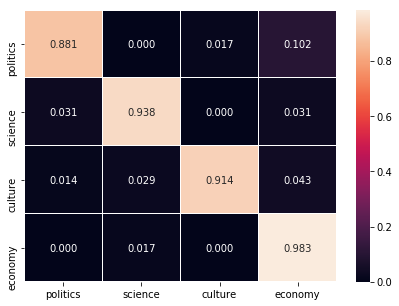

In [24]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=topics, yticklabels=topics)
plt.figure(figsize = (11,11))

**Linear Support Vector Classification**

In [25]:
modelSVM = LinearSVC().fit(X_train, y_train)

In [26]:
y_test_predict = modelSVM.predict(X_test)
reportSVM = classification_report(y_test, y_test_predict, target_names=topics)
print(reportSVM)

             precision    recall  f1-score   support

   politics       0.93      0.95      0.94        59
    science       0.97      0.95      0.96        64
    culture       1.00      0.96      0.98        70
    economy       0.92      0.97      0.94        59

avg / total       0.96      0.96      0.96       252



In [27]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[56,  0,  0,  3],
       [ 2, 61,  0,  1],
       [ 1,  1, 67,  1],
       [ 1,  1,  0, 57]], dtype=int64)

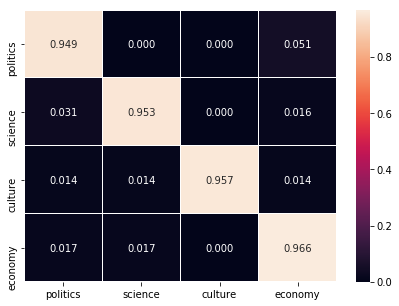

In [28]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=topics, yticklabels=topics)
plt.figure(figsize = (11,11))

**Random Forest Classifier**

In [29]:
modelRF = RandomForestClassifier(n_estimators=1000).fit(X_train, y_train)

In [30]:
y_test_predict = modelRF.predict(X_test)
report = classification_report(y_test, y_test_predict, target_names=topics)
print(report)

             precision    recall  f1-score   support

   politics       0.93      0.88      0.90        59
    science       0.93      0.88      0.90        64
    culture       0.98      0.90      0.94        70
    economy       0.79      0.97      0.87        59

avg / total       0.91      0.90      0.91       252



In [31]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[52,  1,  1,  5],
       [ 2, 56,  0,  6],
       [ 1,  2, 63,  4],
       [ 1,  1,  0, 57]], dtype=int64)

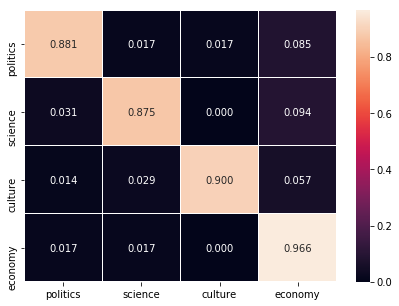

In [32]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=topics, yticklabels=topics)
plt.figure(figsize = (11,11))

(0, 0.001)

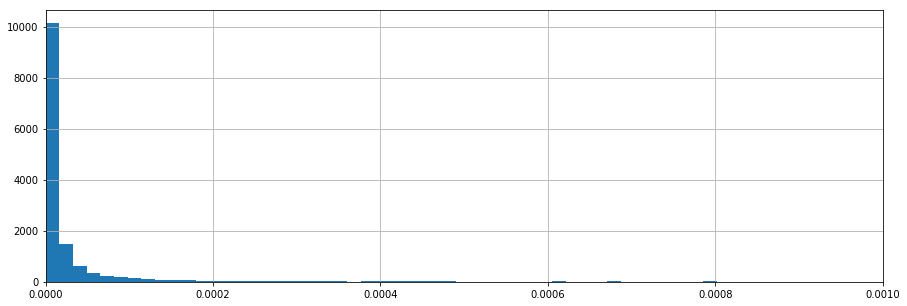

In [33]:
plt.figure(figsize=(15, 5))

plt.hist(modelRF.feature_importances_, bins=1000)
plt.grid(True)
plt.xlim(0, 0.001)

**Gradient Boosting Classifier**

In [34]:
modelGBC = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)

In [35]:
y_test_predict = modelGBC.predict(X_test)
report = classification_report(y_test, y_test_predict, target_names=topics)
print(report)

             precision    recall  f1-score   support

   politics       0.93      0.93      0.93        59
    science       0.98      0.88      0.93        64
    culture       0.97      0.84      0.90        70
    economy       0.76      0.97      0.85        59

avg / total       0.91      0.90      0.90       252



In [36]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[55,  0,  0,  4],
       [ 1, 56,  2,  5],
       [ 2,  0, 59,  9],
       [ 1,  1,  0, 57]], dtype=int64)

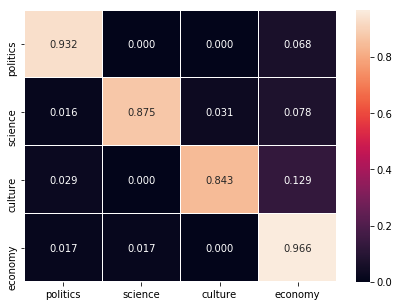

In [37]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=topics, yticklabels=topics)
plt.figure(figsize = (11,11))

(0, 0.001)

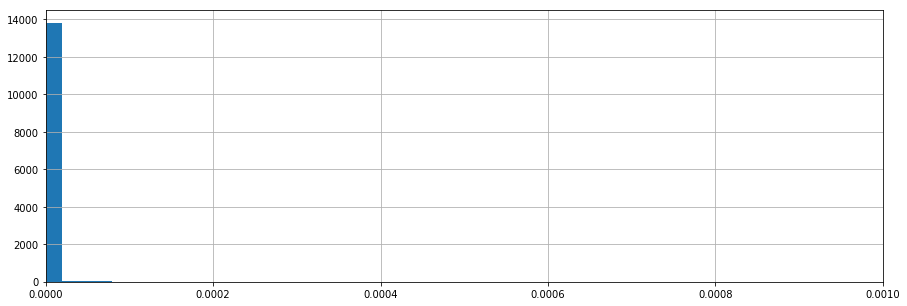

In [38]:
plt.figure(figsize=(15, 5))

plt.hist(modelGBC.feature_importances_, bins=2000)
plt.grid(True)
plt.xlim(0, 0.001)

**Future selection for Random Forest Classifier**

In [39]:
from sklearn.feature_selection import SelectFromModel

feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=100)).fit(X_train, y_train)

In [40]:
X_train_transformed = feature_selector.transform(X_train)
X_test_transformed = feature_selector.transform(X_test)

In [41]:
print("Old dimension:                    X_train -", X_train.shape, ", X_test -", X_test.shape)
print("Dimension after future selection: X_train -", X_train_transformed.shape, " , X_test -", X_test_transformed.shape)

Old dimension:                    X_train - (588, 14370) , X_test - (252, 14370)
Dimension after future selection: X_train - (588, 1908)  , X_test - (252, 1908)


Create Logistic Regression Classification with new selected futures

In [42]:
modelLR_new = LogisticRegression().fit(X_train_transformed, y_train)

Compare metrics of new Logistic Regression model and last Logistic Regression model

In [43]:
y_test_predict_new = modelLR_new.predict(X_test_transformed)
reportLR_new = classification_report(y_test, y_test_predict_new, target_names=topics)
print(reportLR_new)

             precision    recall  f1-score   support

   politics       0.95      0.88      0.91        59
    science       0.94      0.94      0.94        64
    culture       0.98      0.93      0.96        70
    economy       0.85      0.97      0.90        59

avg / total       0.93      0.93      0.93       252



In [44]:
print(reportLR)

             precision    recall  f1-score   support

   politics       0.95      0.88      0.91        59
    science       0.95      0.94      0.94        64
    culture       0.98      0.91      0.95        70
    economy       0.84      0.98      0.91        59

avg / total       0.93      0.93      0.93       252



**Create essambling ** 

In [45]:
ens = VotingClassifier([('LR', LogisticRegression()),
                        ('rf_gini_100', RandomForestClassifier(n_estimators=100)),
                        ('rf_entropy_1000', RandomForestClassifier(n_estimators=1000, criterion='entropy')),
                        ('gbt_100', GradientBoostingClassifier(n_estimators=100))], voting='soft', n_jobs=1)
ens.fit(X_train, y_train)
y_test_predict = ens.predict(X_test)

In [46]:
report = classification_report(y_test, y_test_predict, target_names=topics)
print(report)

             precision    recall  f1-score   support

   politics       0.95      0.90      0.92        59
    science       0.98      0.91      0.94        64
    culture       0.98      0.91      0.95        70
    economy       0.81      0.98      0.89        59

avg / total       0.93      0.92      0.93       252



In [47]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[53,  0,  0,  6],
       [ 2, 58,  1,  3],
       [ 1,  0, 64,  5],
       [ 0,  1,  0, 58]], dtype=int64)

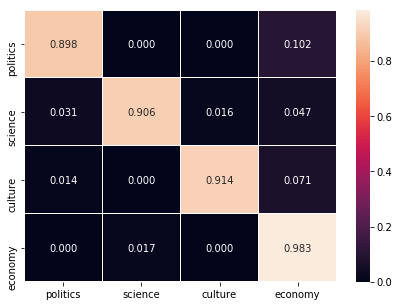

In [48]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=topics, yticklabels=topics)
plt.figure(figsize = (11,11))

In [49]:
ens = VotingClassifier([('LR', LogisticRegression()),
                        ('SVM', LinearSVC()),
                        ('rf_1000', RandomForestClassifier(n_estimators=1000, criterion='entropy')),
                        ('gbt_100', GradientBoostingClassifier(n_estimators=10))], voting='hard', n_jobs=1)
ens.fit(X_train, y_train)
y_test_predict = ens.predict(X_test)

In [50]:
report = classification_report(y_test, y_test_predict, target_names=topics)
print(report)

             precision    recall  f1-score   support

   politics       0.93      0.92      0.92        59
    science       0.95      0.95      0.95        64
    culture       1.00      0.93      0.96        70
    economy       0.88      0.97      0.92        59

avg / total       0.94      0.94      0.94       252



In [51]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[54,  0,  0,  5],
       [ 2, 61,  0,  1],
       [ 1,  2, 65,  2],
       [ 1,  1,  0, 57]], dtype=int64)

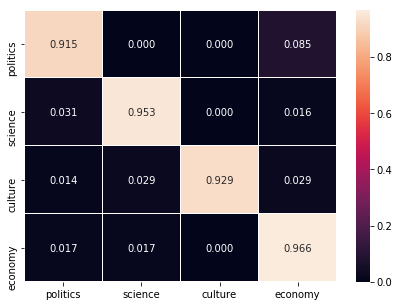

In [52]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=topics, yticklabels=topics)
plt.figure(figsize = (11,11))

**Binary classification**

In [53]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

**One by All**

In [54]:
oneTOall = OneVsRestClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [55]:
y_test_predict = oneTOall.predict(X_test)
report = classification_report(y_test, y_test_predict, target_names=topics)
print(report)

             precision    recall  f1-score   support

   politics       0.93      0.95      0.94        59
    science       0.97      0.95      0.96        64
    culture       1.00      0.96      0.98        70
    economy       0.92      0.97      0.94        59

avg / total       0.96      0.96      0.96       252



In [56]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[56,  0,  0,  3],
       [ 2, 61,  0,  1],
       [ 1,  1, 67,  1],
       [ 1,  1,  0, 57]], dtype=int64)

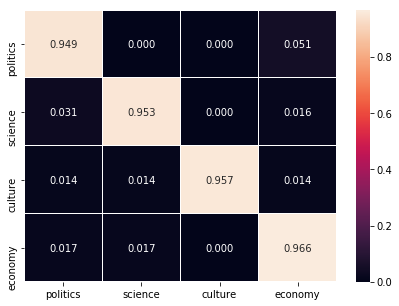

In [57]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=topics, yticklabels=topics)
plt.figure(figsize = (11,11))

**One by one**

In [58]:
oneTOone = OneVsOneClassifier(LinearSVC(), n_jobs=8).fit(X_train, y_train)

In [59]:
y_test_predict = oneTOone.predict(X_test)
report = classification_report(y_test, y_test_predict, target_names=topics)
print(report)

             precision    recall  f1-score   support

   politics       0.95      0.93      0.94        59
    science       0.97      0.94      0.95        64
    culture       1.00      0.94      0.97        70
    economy       0.88      0.98      0.93        59

avg / total       0.95      0.95      0.95       252



In [60]:
matrix = confusion_matrix(y_test, y_test_predict)
matrix

array([[55,  0,  0,  4],
       [ 2, 60,  0,  2],
       [ 1,  1, 66,  2],
       [ 0,  1,  0, 58]], dtype=int64)

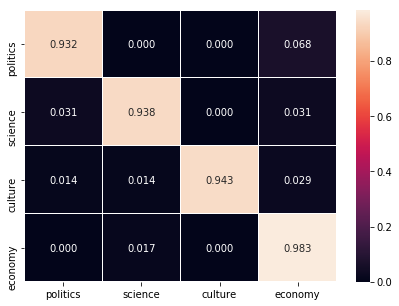

In [61]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (7,5))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=topics, yticklabels=topics)
plt.figure(figsize = (11,11))

**Politics VS Economy**

In [62]:
X_train_PE = np.array([X_train[i].toarray()[0] for i in range(0, X_train.shape[0]) if y_train[i] == 0 or y_train[i] == 3])
y_train_PE = [i for i in y_train if i == 0 or i == 3]

# y_train_PE[y_train_PE == 0] = 0
# y_train_PE[y_train_PE == 3] = 1

X_test_PE = np.array([X_test[i].toarray()[0] for i in range(0, X_test.shape[0]) if y_test[i] == 0 or y_test[i] == 3])
y_test_PE = [i for i in y_test if i == 0 or i == 3]

# y_test_PE[y_test_PE == 0] = 0
# y_test_PE[y_test_PE == 3] = 1

In [63]:
print("TRAIN:")
print("   Attributes shape -", X_train_PE.shape)
print("   Label length     - ", len(y_train_PE))
print("TEST:")
print("   Attributes shape -", X_test_PE.shape)
print("   Label length     - ", len(y_test_PE))

TRAIN:
   Attributes shape - (302, 14370)
   Label length     -  302
TEST:
   Attributes shape - (118, 14370)
   Label length     -  118


In [64]:
pTOe = RandomForestClassifier(n_estimators=100).fit(X_train_PE, y_train_PE)

In [65]:
y_test_PE_predict = pTOe.predict(X_test_PE)
report = classification_report(y_test_PE, y_test_PE_predict)
print(report)

             precision    recall  f1-score   support

          0       0.94      0.83      0.88        59
          3       0.85      0.95      0.90        59

avg / total       0.90      0.89      0.89       118



In [66]:
matrix = confusion_matrix(y_test_PE, y_test_PE_predict)
matrix

array([[49, 10],
       [ 3, 56]], dtype=int64)

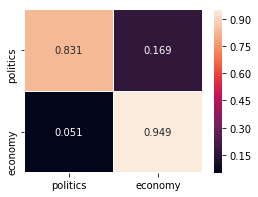

In [67]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (4,3))
sb.heatmap(matrix, annot=True, fmt=".3f", linewidths=.1, xticklabels=[topics[0], topics[3]], yticklabels=[topics[0], topics[3]])
plt.figure(figsize = (11,11))